In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import os.path
import ast

In [2]:
matplotlib.rcParams['figure.figsize'] = (12, 10) 

## Introduction

pd.set_option('display.max_rows', 1000)

## Data Exploration

In [7]:
data_file = 'CSV/bitstring_data.csv'

if not os.path.exists(data_file):
    print('Cannot find data')
    

In [4]:
bs_df = pd.read_csv('bitstring_data.csv', sep=',', header=0)

In [54]:
uniquebs_df.lineno.unique()

array([ 216,  218,  464, ...,  261, 1904, 3465], dtype=int64)

0        216
1        218
2        464
3        467
4        533
        ... 
3894    4285
3895    4289
3896    4291
3897    4292
3898    4296
Name: lineno, Length: 3680, dtype: int64

In [5]:
bs_df.head()

,source_file,mutation_number,mutant_operator_type,lineno,ast_depth,num_test_cover,num_executed,num_assert_tm,num_assert_tc,function_max_depth,function_avg_depth,class_max_depth,lineno_loc,loc_list,status
0,bitstring.py,1,AOD,216,8,24,57,97,1094,7,6.333333,11,233,"['103:109', '53:56', '224:234', '191:202', '16...",killed
1,bitstring.py,2,AOD,218,7,24,57,97,1094,7,6.333333,11,233,"['103:109', '53:56', '224:234', '191:202', '16...",killed
2,bitstring.py,3,AOD,464,8,0,0,0,0,0,0.000000,0,0,[],survived
3,bitstring.py,4,AOD,467,9,1,256,0,0,0,0.000000,0,0,[],killed
4,bitstring.py,5,AOD,533,10,6,127,51,610,8,7.333333,11,64,"['3080:3091', '2483:2489', '2439:2459', '2461:...",killed


In [6]:
bs_df.describe()

,mutation_number,lineno,ast_depth,num_test_cover,num_executed,num_assert_tm,num_assert_tc,function_max_depth,function_avg_depth,class_max_depth,lineno_loc
count,3899.000000,3899.000000,3899.000000,3899.000000,3.899000e+03,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,1950.000000,1788.854578,5.954604,33.685304,3.243357e+03,145.381380,571.650167,6.955630,5.628653,8.479354,273.028982
std,1125.688678,1129.775590,2.179300,76.065371,7.032556e+04,294.595306,496.043970,3.504791,2.688087,4.136123,541.286145
min,1.000000,60.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,975.500000,679.000000,4.000000,1.000000,2.000000e+00,5.000000,26.000000,7.000000,6.250000,8.000000,8.000000
50%,1950.000000,1621.000000,6.000000,7.000000,2.600000e+01,38.000000,600.000000,8.000000,6.750000,11.000000,72.000000
75%,2924.500000,2620.000000,7.000000,26.000000,1.150000e+02,130.500000,904.000000,9.000000,7.000000,11.000000,253.000000
max,3899.000000,4296.000000,17.000000,477.000000,2.359296e+06,1707.000000,1739.000000,11.000000,11.000000,11.000000,3074.000000


In [7]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 15 columns):
source_file             3899 non-null object
mutation_number         3899 non-null int64
mutant_operator_type    3899 non-null object
lineno                  3899 non-null int64
ast_depth               3899 non-null int64
num_test_cover          3899 non-null int64
num_executed            3899 non-null int64
num_assert_tm           3899 non-null int64
num_assert_tc           3899 non-null int64
function_max_depth      3899 non-null int64
function_avg_depth      3899 non-null float64
class_max_depth         3899 non-null int64
lineno_loc              3899 non-null int64
loc_list                3899 non-null object
status                  3899 non-null object
dtypes: float64(1), int64(10), object(4)
memory usage: 457.0+ KB


## Data Cleaning

In [8]:
bs_df.isnull().values.any()

False

In [9]:
bs_df['status'].value_counts()

killed         2794
survived        886
incompetent     172
timeout          47
Name: status, dtype: int64

In [10]:
bs_df = bs_df[bs_df.status != 'incompetent']
bs_df = bs_df[bs_df.status != 'timeout']
bs_df['status'].value_counts()

killed      2794
survived     886
Name: status, dtype: int64

In [11]:
bs_df['mutant_operator_type'].value_counts()

CRP    1711
AOR     545
ROR     450
COI     412
LOR     123
COD      98
ASR      70
SIR      54
LCR      40
EXS      38
AOD      36
IHD      27
EHD      25
IOD      18
SCI      15
BCR      10
LOD       7
DDL       1
Name: mutant_operator_type, dtype: int64

In [12]:
one_hot= pd.get_dummies(bs_df['mutant_operator_type'])
bs_df = bs_df.drop('mutant_operator_type',axis = 1)
bs_df = bs_df.join(one_hot)
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3680 entries, 0 to 3898
Data columns (total 32 columns):
source_file           3680 non-null object
mutation_number       3680 non-null int64
lineno                3680 non-null int64
ast_depth             3680 non-null int64
num_test_cover        3680 non-null int64
num_executed          3680 non-null int64
num_assert_tm         3680 non-null int64
num_assert_tc         3680 non-null int64
function_max_depth    3680 non-null int64
function_avg_depth    3680 non-null float64
class_max_depth       3680 non-null int64
lineno_loc            3680 non-null int64
loc_list              3680 non-null object
status                3680 non-null object
AOD                   3680 non-null uint8
AOR                   3680 non-null uint8
ASR                   3680 non-null uint8
BCR                   3680 non-null uint8
COD                   3680 non-null uint8
COI                   3680 non-null uint8
CRP                   3680 non-null uint8
DDL   

In [13]:
X_bs = bs_df.drop(labels=['source_file','mutation_number', 'loc_list', 'status'], axis=1)
y_bs = bs_df[['status']]

In [14]:
m = X_bs.shape[0]
n = X_bs.shape[1]
print('m = ', m)
print('n = ', n)

m =  3680
n =  28


In [15]:
y_bs = y_bs.replace({'killed':0})
y_bs = y_bs.replace({'survived':1})

In [16]:
X_bs = X_bs.astype(float)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_bs = scaler.fit_transform(X_bs)
X_bs = pd.DataFrame(X_bs)

In [18]:
X_bs.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.390830,0.926133,-0.124514,-0.040511,-0.162296,1.057182,0.021179,0.269769,0.614742,-0.071180,...,-0.082704,-0.102146,-0.085972,-0.07011,-0.104828,-0.043655,-0.185956,-0.373254,-0.063975,-0.122035
1,-1.389067,0.468722,-0.124514,-0.040511,-0.162296,1.057182,0.021179,0.269769,0.614742,-0.071180,...,-0.082704,-0.102146,-0.085972,-0.07011,-0.104828,-0.043655,-0.185956,-0.373254,-0.063975,-0.122035
2,-1.172148,0.926133,-0.445531,-0.042077,-0.496352,-1.147126,-1.977253,-2.087565,-2.040198,-0.507399,...,-0.082704,-0.102146,-0.085972,-0.07011,-0.104828,-0.043655,-0.185956,-0.373254,-0.063975,-0.122035
3,-1.169503,1.383543,-0.432155,-0.035044,-0.496352,-1.147126,-1.977253,-2.087565,-2.040198,-0.507399,...,-0.082704,-0.102146,-0.085972,-0.07011,-0.104828,-0.043655,-0.185956,-0.373254,-0.063975,-0.122035
4,-1.111305,1.840954,-0.365277,-0.038588,-0.320714,0.081967,0.306669,0.641979,0.614742,-0.387579,...,-0.082704,-0.102146,-0.085972,-0.07011,-0.104828,-0.043655,-0.185956,-0.373254,-0.063975,-0.122035


In [19]:
X_bs.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,...,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03
mean,-3.135173e-16,3.438071e-16,1.068499e-15,7.409155e-17,2.002927e-16,-8.185481e-16,-7.666573e-16,3.685458e-16,-1.862278e-15,1.221909e-15,...,2.009692e-15,-1.277473e-15,-4.131199e-15,3.233917e-15,5.476582e-15,-6.895526e-17,-5.653645e-15,-1.316522e-14,5.334871e-15,-5.559804e-15
std,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,...,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00
min,-1.528388e+00,-1.818332e+00,-4.455310e-01,-4.207681e-02,-4.963523e-01,-1.147126e+00,-1.977253e+00,-2.087565e+00,-2.040198e+00,-5.073993e-01,...,-8.270396e-02,-1.021461e-01,-8.597200e-02,-7.010953e-02,-1.048285e-01,-4.365546e-02,-1.859562e-01,-3.732545e-01,-6.397476e-02,-1.220346e-01
25%,-9.825649e-01,-9.035106e-01,-4.321553e-01,-4.202186e-02,-4.791329e-01,-1.098769e+00,2.117904e-02,2.201406e-01,-3.506908e-01,-4.924218e-01,...,-8.270396e-02,-1.021461e-01,-8.597200e-02,-7.010953e-02,-1.048285e-01,-4.365546e-02,-1.859562e-01,-3.732545e-01,-6.397476e-02,-1.220346e-01
50%,-1.536894e-01,1.131097e-02,-3.519011e-01,-4.140371e-02,-3.654848e-01,-6.444416e-04,3.066694e-01,4.248564e-01,6.147420e-01,-3.782184e-01,...,-8.270396e-02,-1.021461e-01,-8.597200e-02,-7.010953e-02,-1.048285e-01,-4.365546e-02,-1.859562e-01,-3.732545e-01,-6.397476e-02,-1.220346e-01
75%,7.651279e-01,4.687218e-01,-9.776261e-02,-3.893795e-02,-4.434279e-02,6.743493e-01,5.921597e-01,5.179091e-01,6.147420e-01,-2.999162e-02,...,-8.270396e-02,-1.021461e-01,-8.597200e-02,-7.010953e-02,-1.048285e-01,-4.365546e-02,-1.859562e-01,-3.732545e-01,-6.397476e-02,-1.220346e-01
max,2.206842e+00,5.042830e+00,5.934682e+00,5.757435e+01,5.382355e+00,2.356796e+00,1.163140e+00,2.006752e+00,6.147420e-01,5.247703e+00,...,1.209132e+01,9.789898e+00,1.163169e+01,1.426340e+01,9.539392e+00,2.290664e+01,5.377611e+00,2.679138e+00,1.563117e+01,8.194397e+00


## Data Visualization

### Outliers and Boxplots

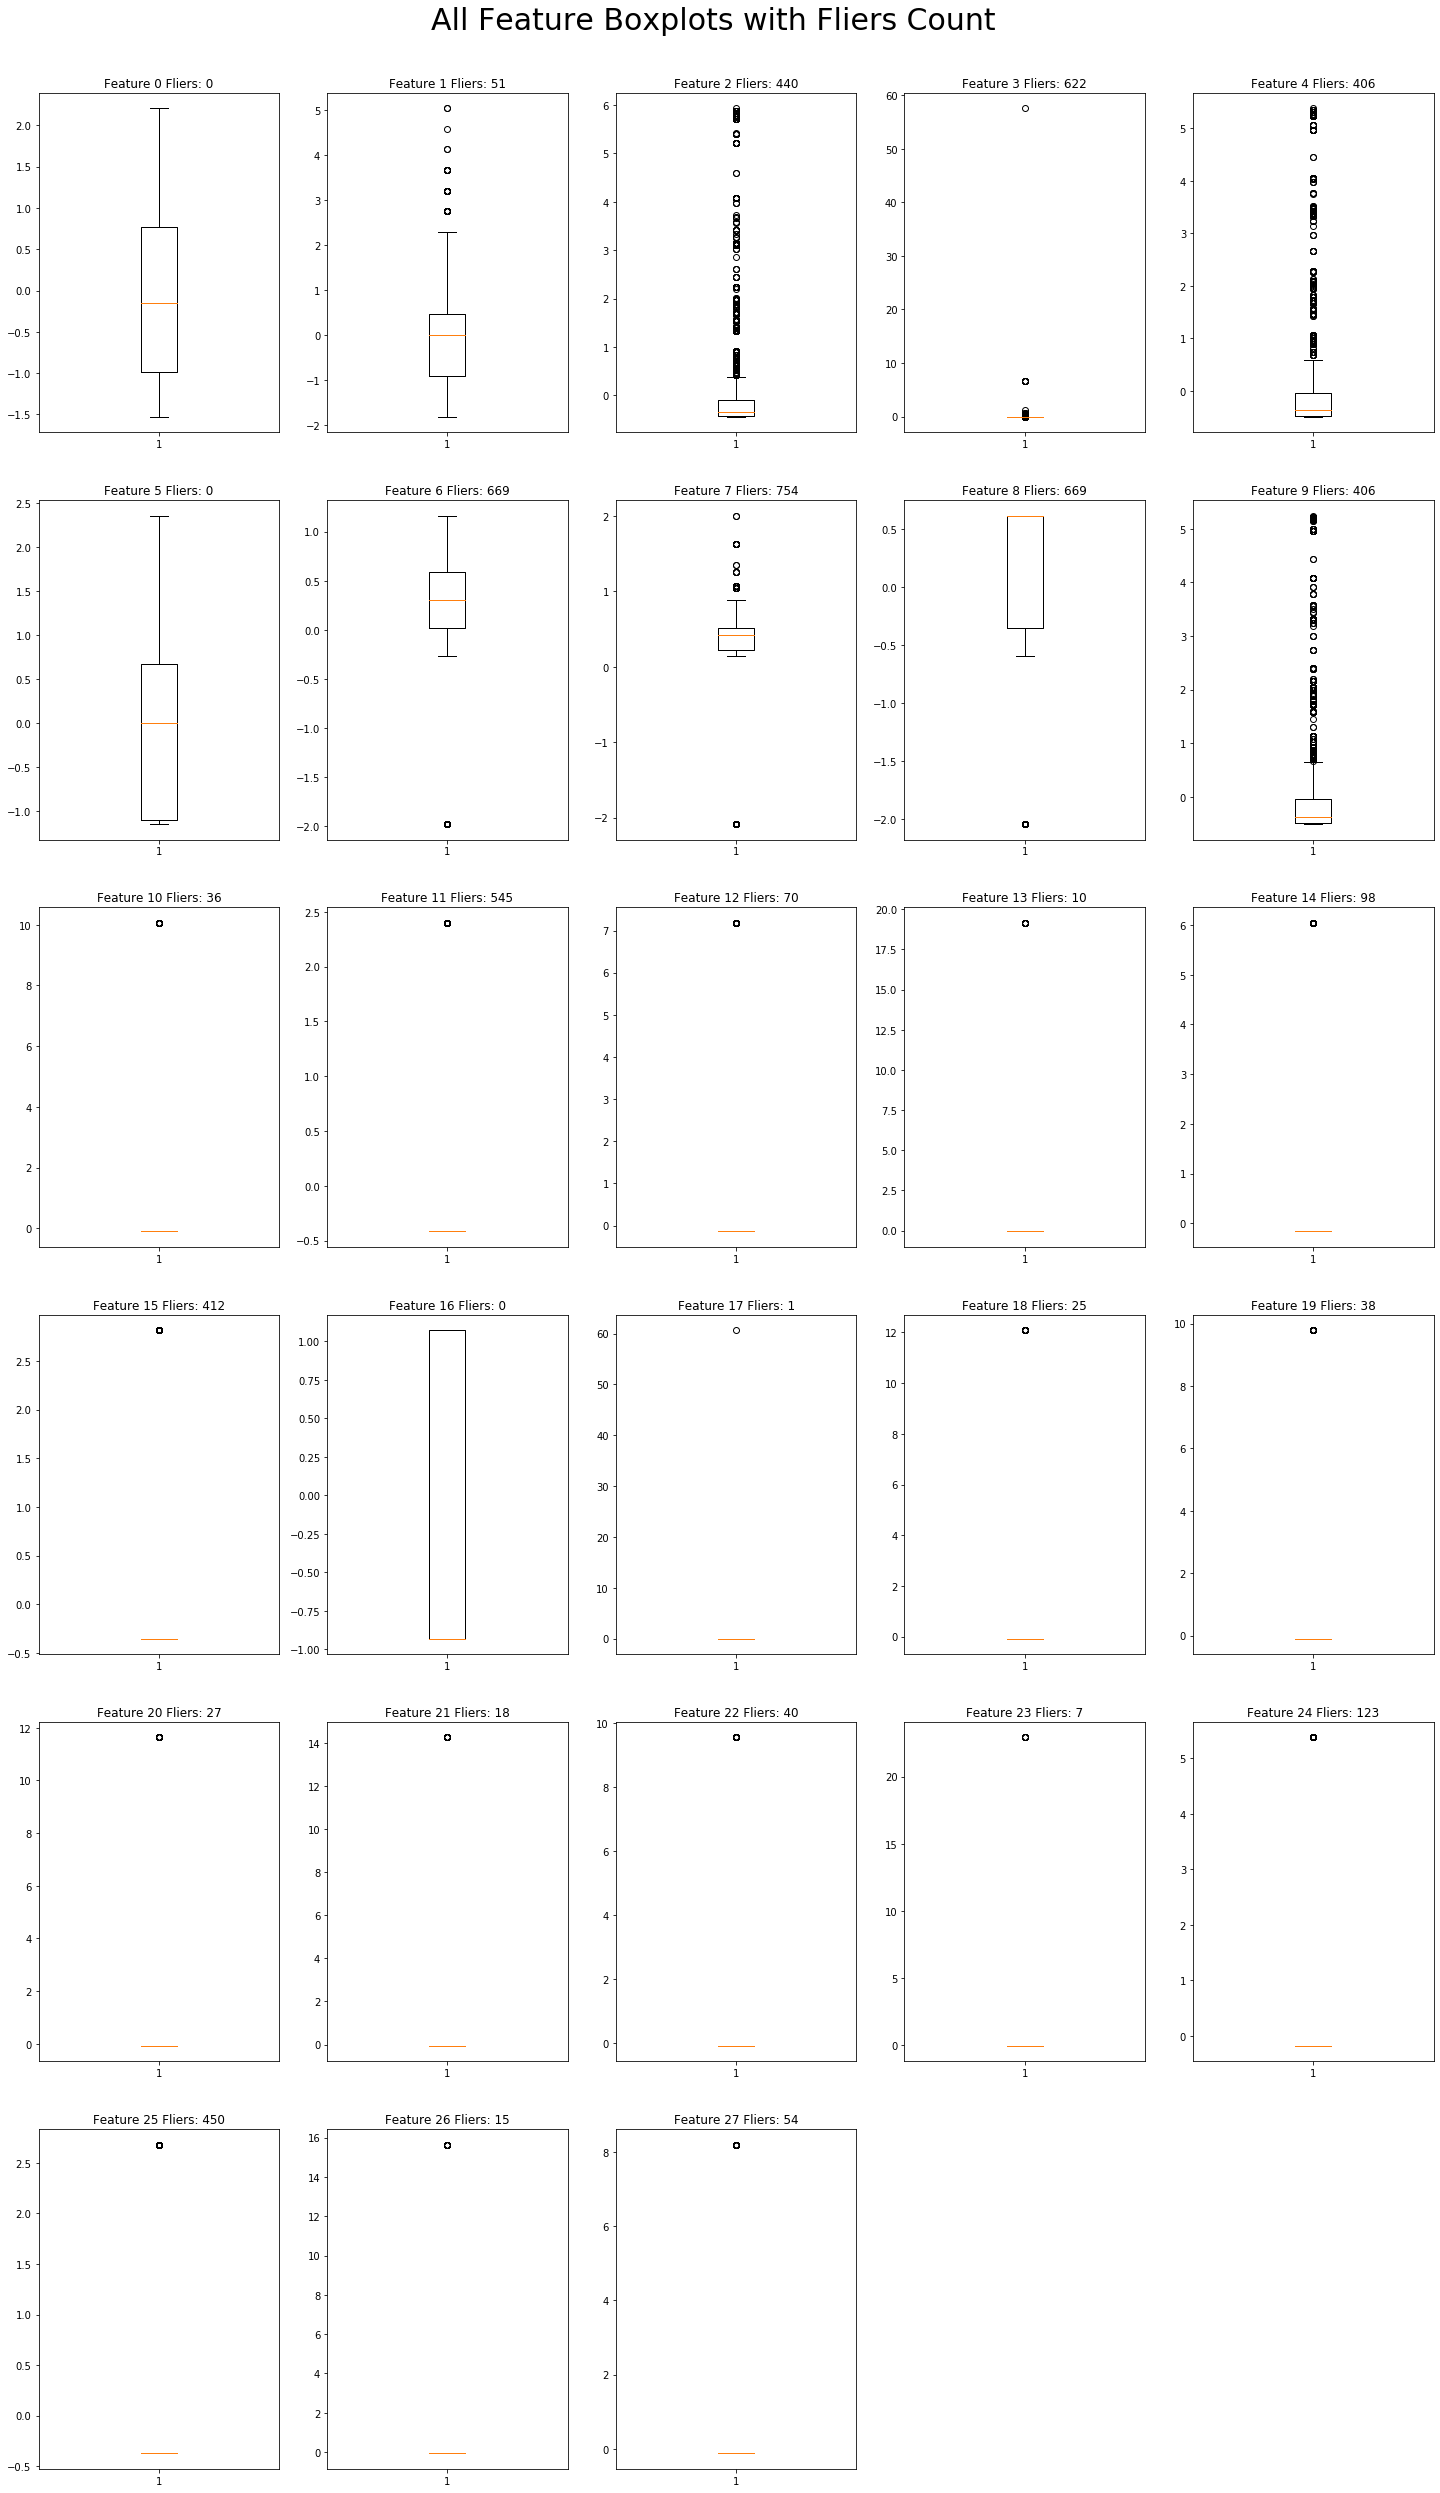

In [20]:
fig = plt.figure(figsize = (25, 40))
unique_fliers = []

col = 5
row = np.ceil(X_bs.shape[1]/col).astype(int)


for r in range(X_bs.shape[1]):
    plt.subplot(row,col,r+1)
    dict_boxPlot = plt.boxplot(X_bs[r])
    _,fliers = dict_boxPlot['fliers'][0].get_data()
    plt.title('Feature {} Fliers: {}'.format(r, fliers.size))

    lower_cap = dict_boxPlot['caps'][0].get_ydata()[0] 
    upper_cap = dict_boxPlot['caps'][1].get_ydata()[0] 

    idx_tuple = np.where((X_bs[r] > upper_cap) | (X_bs[r] < lower_cap))
    idx_fliers = idx_tuple[0]

    for q in idx_fliers:    
        unique_fliers.append(q)

fig.subplots_adjust(top=0.95)
fig.suptitle("All Feature Boxplots with Fliers Count",fontsize=30)
plt.show()


In [21]:
unique_fliers,y_counts = np.unique(unique_fliers, return_counts=True)
print(unique_fliers.size)
print(y_counts.max()) # One instance has an outlier in this many features

2826
5


### Correlation and Dependencies

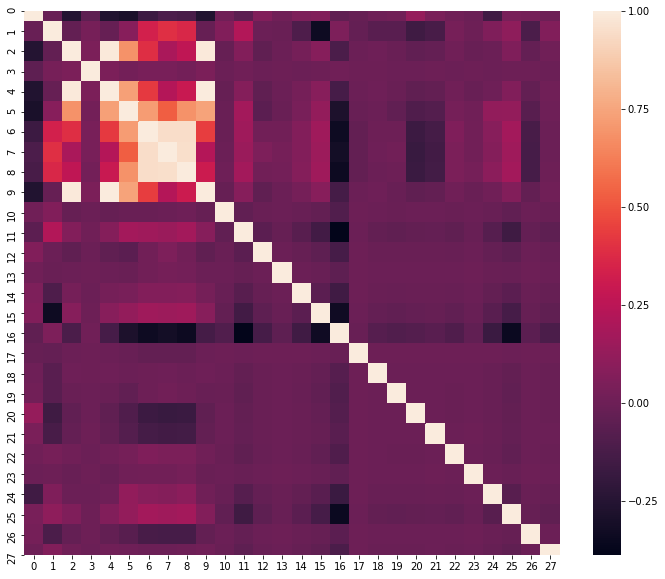

In [22]:
X_corr = X_bs.corr()
sns.heatmap(X_corr)

In [23]:
threshold = 0.7
print("Correlations greater than {}\n".format(threshold))
print("Feature\tFeature\tCorrelation")
corr_col_index = []
for i in range(X_corr.shape[0]):
    for j in range(i+1, X_corr.shape[0]):
        if X_corr[i][j] >= threshold:
            print("{}\t{}\t{}\t".format(i, j, X_corr[i][j]))
            corr_col_index.append([i,j])

Correlations greater than 0.7

Feature	Feature	Correlation
2	4	0.9941052369344562	
2	9	0.990948513169562	
4	5	0.7313783303770344	
4	9	0.9983831947655528	
5	6	0.7220269808781852	
5	9	0.7412527049328925	
6	7	0.9471113645502941	
6	8	0.9493159316157376	
7	8	0.9558821569879932	


### Examining PCA Components

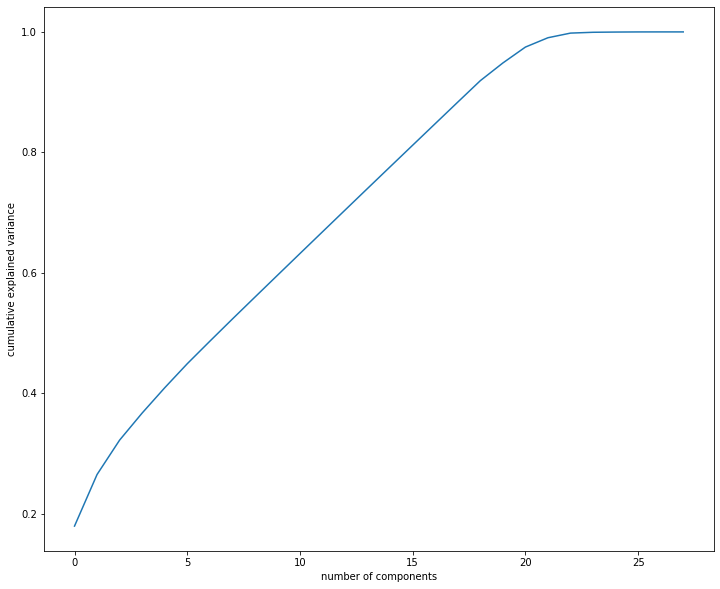

In [24]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_bs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [25]:
ratio = pca.explained_variance_ratio_

print("\tPCA Component Variance Ratios\nFeatures: \t Ratio")
for i in range(5,26,5):
    print(" {} \t {}".format(i, np.sum(ratio[0:i])))

	PCA Component Variance Ratios
Features: 	 Ratio
 5 	 0.4094390217988063
 10 	 0.5960702971764987
 15 	 0.7761995779802703
 20 	 0.9484605185398983
 25 	 0.9997554545154862


In [26]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X_bs)
projected.shape

(3680, 2)

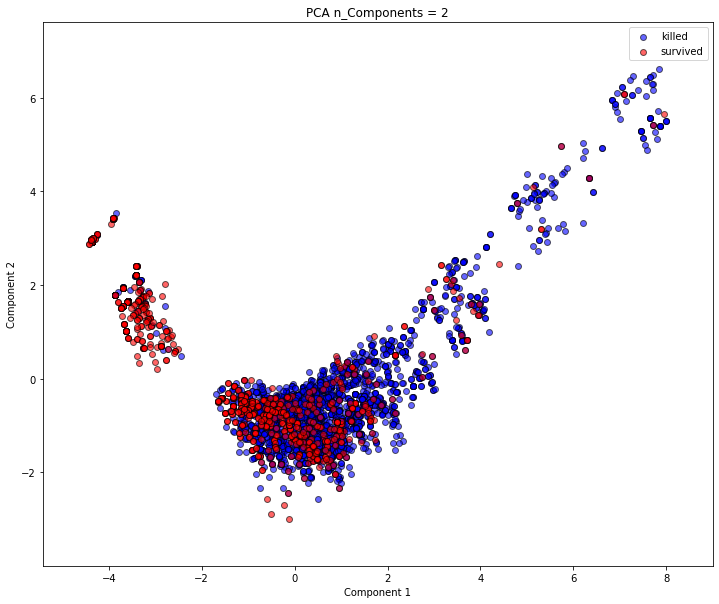

In [27]:
RB_idx = np.where(y_bs == 0)
NRB_idx = np.where(y_bs == 1) 


x_min, x_max = projected[:, 0].min() - 1, projected[:, 0].max() + 1
y_min, y_max = projected[:, 1].min() - 1, projected[:, 1].max() + 1

plt.scatter(projected[RB_idx, 0], projected[RB_idx, 1], c='b', edgecolor='k', alpha=0.6, label='killed')
plt.scatter(projected[NRB_idx, 0], projected[NRB_idx, 1], c='r', edgecolor='k', alpha=0.6, label='survived')
plt.axis([x_min, x_max, y_min, y_max])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA n_Components = 2')
plt.legend()

## Data Pre-Processing

#### Functions Used to Pre-Process Data

In [28]:
def removeCorrelations(X, threshold):
    """
    Drop Featurs with high correlations at a given threshold.
    
    Args
    ----
    X (PD DataFrame): Data with mxn, where m are instances and n is features
    threshold (float): Threshold to drop features from data.
    
    Returns
    -------
    X_new (PD DataFrame): New data with dropped feature columns.
    """

    X_corr = X.corr().abs()
    traingle = X_corr.where(np.triu(np.ones(X_corr.shape), k=1).astype(np.bool))

    drop_col = [column for column in traingle.columns if any(traingle[column] >= threshold)]   
    X_new = X.drop(columns=drop_col)    
    
    return X_new

In [29]:
def removeOutliers(X, y, threshold):
    """
    Drop Featurs with high correlations at a given threshold.
    
    Args
    ----
    X (PD DataFrame): Data with mxn, where m are instances and n is features
    threshold (float): Threshold to drop instances from data.
    y (PD Series): Classification column to match instance drops.
    
    Returns
    -------
    X_new (PD DataFrame): New data with dropped istances.
    y_new (PD Series): New classification column to math dropped instances.
    """
    
    list_fliers = []
   
    
    for i in X.columns:
        # Create figure to extract caps, but do not display figures
        fig = plt.figure()
        dict_boxPlot = plt.boxplot(X[i])
        plt.close(fig)

        lower_cap = dict_boxPlot['caps'][0].get_ydata()[0] 
        upper_cap = dict_boxPlot['caps'][1].get_ydata()[0] 

        idx_tuple = np.where((X[i] > upper_cap) | (X[i] < lower_cap))
        idx_fliers = idx_tuple[0]

        for q in idx_fliers:    
            list_fliers.append(q)
        i+=1

    unique_fliers,y_counts = np.unique(list_fliers, return_counts=True)

    drop_row_idx = np.where(y_counts >= threshold)
    drop_row = unique_fliers[drop_row_idx]
    
    X_new = X.drop(drop_row)    
    y_new = y.drop(drop_row)
    return X_new, y_new

#### Setting Threshold Parameters

Threshold parameters are set to remove outliers and dropped highly correlated feature columns.

In [30]:
from sklearn.model_selection import train_test_split

X_orginal = X_bs
y_original = y_bs

In [31]:
def resetThresholds(X_orginal,y_original, c_threshold, o_threshold):
    X = X_orginal
    y = y_original
    
    if c_threshold != 0:
        X = removeCorrelations(X, c_threshold)
    if o_threshold != 0:
        X, y = removeOutliers(X, y_original, o_threshold)
    return train_test_split(X, y, test_size=0.25, random_state=42)

## Algorithm Implementation

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

#### Voting classifier with a Logistic Regressor, SVM, and a Random Forest

In [33]:
log_clf = LogisticRegression(solver='newton-cg', C=5.0, max_iter=10000)
svm_clf = SVC(gamma='auto',probability=True)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('rnd', rnd_clf)],
    voting='hard')

result = {}

for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
    result[clf.__class__.__name__] = []
result['Correlation Threshold'] = []
result['Outlier Threshold'] = []


c_list = [0, 0.9, 0.85, 0.8, 0.75]
o_list = [0, 15, 10, 8]

for c_threshold in c_list:
    for o_threshold in o_list:
        X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,c_threshold,o_threshold)
        result['Correlation Threshold'].append(c_threshold)
        result['Outlier Threshold'].append(o_threshold)


        for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
            clf.fit(X_train, np.ravel(y_train))
            y_pred = clf.predict(X_test)
            result[clf.__class__.__name__].append(accuracy_score(y_test, y_pred))

result_df = pd.DataFrame(result)
display(result_df)

,LogisticRegression,SVC,RandomForestClassifier,VotingClassifier,Correlation Threshold,Outlier Threshold
0,0.801087,0.823913,0.868478,0.836957,0.00,0
1,0.801087,0.823913,0.868478,0.836957,0.00,15
2,0.801087,0.823913,0.864130,0.834783,0.00,10
3,0.801087,0.823913,0.860870,0.834783,0.00,8
4,0.796739,0.820652,0.859783,0.825000,0.90,0
5,0.796739,0.820652,0.859783,0.828261,0.90,15
6,0.796739,0.820652,0.854348,0.823913,0.90,10
7,0.796739,0.820652,0.860870,0.828261,0.90,8
8,0.796739,0.820652,0.857609,0.823913,0.85,0
9,0.796739,0.820652,0.856522,0.828261,0.85,15


In [34]:
result_df.max()

LogisticRegression         0.801087
SVC                        0.823913
RandomForestClassifier     0.868478
VotingClassifier           0.836957
Correlation Threshold      0.900000
Outlier Threshold         15.000000
dtype: float64

The SVM classifier performs the best **?** with a correlation threshold of **?** and removing instances with **?** or more outliers. The voting classifier is not an improvement from the SVM.

Next the voting classifier is changed to a soft voting.

In [35]:
log_clf = LogisticRegression(solver='newton-cg', C=5.0, max_iter=10000)
svm_clf = SVC(gamma='auto',probability=True)
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('rnd', rnd_clf)],
    voting='soft')

result = {}

for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
    result[clf.__class__.__name__] = []
result['Correlation Threshold'] = []
result['Outlier Threshold'] = []


c_list = [0, 0.9, 0.85, 0.8, 0.75]
o_list = [0, 15, 10, 8]

for c_threshold in c_list:
    for o_threshold in o_list:
        X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,c_threshold,o_threshold)
        result['Correlation Threshold'].append(c_threshold)
        result['Outlier Threshold'].append(o_threshold)


        for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
            clf.fit(X_train, np.ravel(y_train))
            y_pred = clf.predict(X_test)
            result[clf.__class__.__name__].append(accuracy_score(y_test, y_pred))

result_df = pd.DataFrame(result)
display(result_df)

,LogisticRegression,SVC,RandomForestClassifier,VotingClassifier,Correlation Threshold,Outlier Threshold
0,0.801087,0.823913,0.863043,0.842391,0.00,0
1,0.801087,0.823913,0.864130,0.842391,0.00,15
2,0.801087,0.823913,0.859783,0.844565,0.00,10
3,0.801087,0.823913,0.860870,0.846739,0.00,8
4,0.796739,0.820652,0.856522,0.827174,0.90,0
5,0.796739,0.820652,0.851087,0.827174,0.90,15
6,0.796739,0.820652,0.860870,0.828261,0.90,10
7,0.796739,0.820652,0.855435,0.828261,0.90,8
8,0.796739,0.820652,0.858696,0.827174,0.85,0
9,0.796739,0.820652,0.860870,0.828261,0.85,15


In [40]:
result_df.max()

LogisticRegression        0.794565
SVC                       0.825000
RandomForestClassifier    0.808696
VotingClassifier          0.823913
dtype: float64

??

#### PCA Dimension Reduction

Examines algorithms as n_components increase for the various classifiers.

In [41]:
X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,0.9,10)

result = {}
index = []

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf), ('rnd', rnd_clf)],
    voting='hard')

for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
    result[clf.__class__.__name__] = []
    
for i in range(2,11):
    pca = PCA(n_components=i)
    X_train_new = pca.fit_transform(X_train)
    X_test_new = pca.fit_transform(X_test)
    index.append(i)
    for clf in (log_clf, svm_clf, rnd_clf, voting_clf):
        clf.fit(X_train_new, np.ravel(y_train))
        y_pred = clf.predict(X_test_new)
        result[clf.__class__.__name__].append(accuracy_score(y_test, y_pred))

result_df = pd.DataFrame(result)
display(result_df)

,LogisticRegression,SVC,RandomForestClassifier,VotingClassifier
0,0.776087,0.778261,0.782609,0.780435
1,0.798913,0.760870,0.794565,0.813043
2,0.792391,0.819565,0.788043,0.820652
3,0.781522,0.819565,0.775000,0.805435
4,0.634783,0.757609,0.822826,0.768478
5,0.716304,0.760870,0.759783,0.765217
6,0.658696,0.768478,0.797826,0.763043
7,0.606522,0.815217,0.781522,0.808696
8,0.595652,0.819565,0.783696,0.811957


In [42]:
result_df.max()

LogisticRegression        0.798913
SVC                       0.819565
RandomForestClassifier    0.822826
VotingClassifier          0.820652
dtype: float64

## Conclusion

In [35]:
X_train, X_test, y_train, y_test = resetThresholds(X_orginal,y_original,0.9,10)

In [36]:
print(X_train.shape)
print(X_test.shape)

(771, 38)
(258, 38)


A good model can be achieved with a ? model that produces an accurcy score of **?**.

The results were obtained after removing correlated feature columns about a **?** threshold taking the data from **?** to **?** column features. After these features were removed, instances were examined for being outliers. If one row of data contained more **?** or more occurances of feature data as an outlier, the entire row was considered an outlier and removed from the data set. **?** instances were removed from the dataset leaving **?** instances to train the model.


Applying PCA diminsion reduction techniques did not appear to be useful with this dataset as was shown in the visualizations and models created via the reduced components. To further increase the accuracy of the model, more data can be gathered and features added that may give a better model.